# МКР для решения 1D линейного эллиптического уравнения

## Задача c граничными условиями Дирихле

Необходимо найти поле перемещений $u(x)$ в балке длиной $L=1[м]$, один конец которой зафиксирован, а второй перемещен на 0.01[м]. Балка испытывает инерционную нагрузку от ускорения $a=1[м/c^2]$. Плотность балки распределена по закону $\rho(x) = 2x + 1 [кг/м^3]$. Модуль Юнга балки $E = 10 [Па]$.

![fd_1d_task_1](../images/fd_1d_task_1.svg)


### Формулировка математической модели:

\begin{align}
&\frac{\partial}{\partial x} \left( E \frac{\partial u}{\partial x}\right) + f = 0 \\
&u(0) = 0, u(1) = 0.01 \\
&E = 10. \\
&f = a * \rho(x) = 2x + 1
\end{align}

### Аналитическое решение

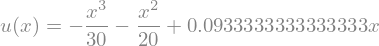

In [1]:
import sympy as sp
sp.init_printing()

u = sp.Function('u')
x = sp.symbols('x')

E = 10
f = 2 * x + 1
u_s = 0
u_t = 0.01

equation = (E * u(x).diff(x, 1)).diff(x, 1) + f

exact = sp.dsolve(equation, 
                  ics={u(0):u_s,
                       u(1):u_t})
display(exact)

Text(0, 0.5, 'u')

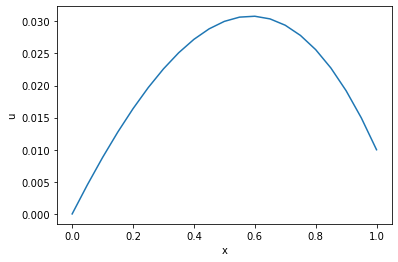

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x_exact = np.arange(0., 1.05, 0.05)
plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact])
plt.xlabel('x')
plt.ylabel('u')

### Численное решение

1. Определяем узлы конечно-разностной сетки

In [3]:
n = 6 # количество узлов
h = 1./n # шаг конечной разности
x_nodes = [i * h for i in range(n + 1)]
print(x_nodes)

[0.0, 0.16666666666666666, 0.3333333333333333, 0.5, 0.6666666666666666, 0.8333333333333333, 1.0]


2. Определяем искомую функцию и ее аппроксимацию в узлах

In [4]:
u = sp.Function('u')
u_approx = [u(i) for i in range(n + 1)]
print(u_approx)

[u(0), u(1), u(2), u(3), u(4), u(5), u(6)]


3. Используя конечные разности и полагая Е постоянной:

\begin{align}
\frac{\partial}{\partial x} \left(E \frac{\partial u_{i}}{\partial x}\right) \approx E \frac{u_{i+1} - 2u_{i} + u_{i-1}}{h^2}
\end{align}

![fd_1d](../images/fd_1d.svg)

запишем уравнение для каждого узла:

\begin{align}
E \frac{u_{i+1} - 2u_{i} + u_{i-1}}{h^2} + 2x_i + 1 = 0.
\end{align}

In [5]:
equations = [(E * (u_approx[i + 1] - 2 * u_approx[i] + u_approx[i - 1])/h**2 + 2. * x_nodes[i] + 1.)
             .subs({u(0):u_s, u(n):u_t})
             for i in range(1, n)]
import pprint
pprint.pprint(equations)

[-720.0*u(1) + 360.0*u(2) + 1.33333333333333,
 360.0*u(1) - 720.0*u(2) + 360.0*u(3) + 1.66666666666667,
 360.0*u(2) - 720.0*u(3) + 360.0*u(4) + 2.0,
 360.0*u(3) - 720.0*u(4) + 360.0*u(5) + 2.33333333333333,
 360.0*u(4) - 720.0*u(5) + 6.26666666666667]


4. Решим систему линейных алгебраических уравнений

In [6]:
unknowns = u_approx[1:n] # исключены крайние узлы
solution = sp.linsolve(equations, unknowns)
print(solution)

{(0.0140123456790123, 0.024320987654321, 0.03, 0.0301234567901235, 0.0237654320987654)}


In [7]:
solution = list(solution)
approx = {u_approx[i+1] : solution[0][i] for i in range(len(solution[0]))}
approx.update({u(0):u_s, 
               u(n):u_t})
print(approx)

{u(1): 0.0140123456790123, u(2): 0.0243209876543210, u(3): 0.0300000000000000, u(4): 0.0301234567901235, u(5): 0.0237654320987654, u(0): 0, u(6): 0.01}


### Анализ решения


Text(0, 0.5, 'u')

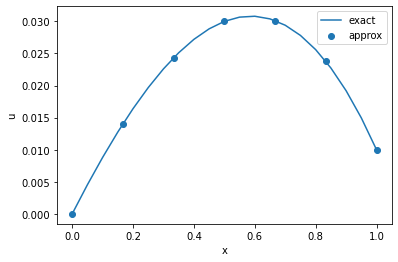

In [8]:
plt.clf()

plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact], label='exact')
plt.scatter(x_nodes, [approx[u_p] for u_p in u_approx], label='approx')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')

## Задача c граничным условием Неймана


Необходимо найти поле перемещений $u(x)$ в балке длиной $L=1[м]$, один конец которой зафиксирован, а ко второму приложена сила растягивающая сила $t = 1 [Н]$. Балка испытывает инерционную нагрузку от ускорения $a=1[м/c^2]$. Плотность балки распределена по закону $\rho(x) = 2x + 1 [кг/м^3]$. Модуль Юнга балки $E = 10 [Па]$.

![fd_1d_task_1](../images/fd_1d_task_2.svg)

### Формулировка математической модели

\begin{align}
&\frac{\partial}{\partial x} \left( E \frac{\partial u}{\partial x} \right) + f = 0 \\
&u(0) = 0, \left.E\frac{\partial u(x)}{\partial x}\right|_{x=1}  = t \\
&E = 10. \\
&f = 2x + 1 \\
&t = -1.
\end{align}


### Аналитическое решение

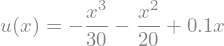

In [9]:
import sympy as sp
sp.init_printing()

u = sp.Function('u')
x = sp.symbols('x')

E = 10
f = 2 * x + 1
u_s = 0.
t = -1.

equation = (E * u(x).diff(x, 1)).diff(x, 1) + f

exact = sp.dsolve(equation, 
                  ics={u(0):u_s, 
                       u(x).diff(x).subs(x, 1):t / E})
display(exact)

Text(0, 0.5, 'u')

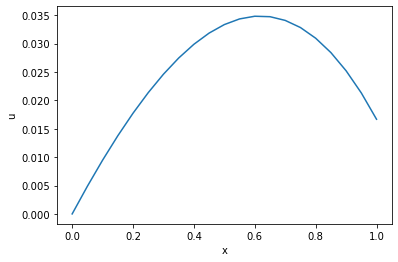

In [10]:
plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact])
plt.xlabel('x')
plt.ylabel('u')

### Численное решение

Граничное условие Неймана в конечно-разностном виде:

\begin{align}
E\frac{\partial u_i}{\partial x} = E \frac{u_i - u_{i-1}}{h} = t
\end{align}

In [11]:
n = 6 # количество узлов
h = 1./n # шаг конечной разности
x_nodes = [i * h for i in range(n + 1)]

u = sp.Function('u')
u_approx = [u(i) for i in range(n + 1)]

equations = [(E * (u_approx[i + 1] - 2 * u_approx[i] + u_approx[i - 1])/h**2 + 2. * x_nodes[i] + 1.)
             .subs({u(0):u_s})
             for i in range(1, n)]

# Добавляем условие Неймана
equations.append(E*(u_approx[n] - u_approx[n-1])/h - t)
import pprint
pprint.pprint(equations)

[-720.0*u(1) + 360.0*u(2) + 1.33333333333333,
 360.0*u(1) - 720.0*u(2) + 360.0*u(3) + 1.66666666666667,
 360.0*u(2) - 720.0*u(3) + 360.0*u(4) + 2.0,
 360.0*u(3) - 720.0*u(4) + 360.0*u(5) + 2.33333333333333,
 360.0*u(4) - 720.0*u(5) + 360.0*u(6) + 2.66666666666667,
 -60.0*u(5) + 60.0*u(6) + 1.0]


In [12]:
unknowns = u_approx[1:n+1] # исключен начальный узел
solution = sp.linsolve(equations, unknowns)
print(solution)
solution = list(solution)
approx = {u_approx[i+1] : solution[0][i] for i in range(len(solution[0]))}
approx.update({u(0):0})
print(approx)

{(0.0111111111111111, 0.0185185185185185, 0.0212962962962963, 0.0185185185185185, 0.00925925925925925, -0.00740740740740741)}
{u(1): 0.0111111111111111, u(2): 0.0185185185185185, u(3): 0.0212962962962963, u(4): 0.0185185185185185, u(5): 0.00925925925925925, u(6): -0.00740740740740741, u(0): 0}


### Анализ решения

Text(0, 0.5, 'u')

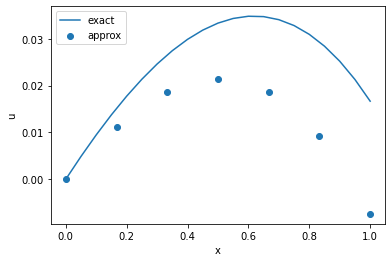

In [13]:
plt.clf()

plt.plot(x_exact, [exact.rhs.subs({x:i}) for i in x_exact], label='exact')
plt.scatter(x_nodes, [approx[u_p] for u_p in u_approx], label='approx')
plt.legend()
plt.xlabel('x')
plt.ylabel('u')

## Упражнения

1. Аналитически и численно найти поле температур в балке длиной $L=10 [м]$. С одного конца балки поддерживается температура $T_0 = 10[K]$, с другого конца балки температура отводится таким образом, чтобы тепловой поток был постоянен и равен $j_t=1 [Вт/м]$. Коэффициент теплопроводности материала равен 10 [Вт/(м·K)].
2. Аналитически и численно найти поле перемещений в вертикальной балке длиной $L=1[м]$. Один конец балки зафиксирван, другой перемещен на 0.1[м]. Модуль Юнга балки равен 10 [Па]. Плотность балки $\rho=1[кг/м]$. Учесть влияние силы тяжести.